# Оценка рыночной стоимости мотоцикла с пробегом

## Выполнили: Болгарин Максим, Моисеенков Павел. BD-11

<br>

**Цель проекта:** проанализировать факторы, влияющие на рыночную стоимость подержанных мотоциклов, и научиться её предсказывать. Какую пользу можно вынести из этого простому человеку? Зная, как образуется стоимость мотоцикла, владелец подобного транспортного средства может подобрать подходящую для него цену для продажи. С другой стороны, будущий владелец сможет оценить адекватность заинтересовавшего его предложения.

**План выполнения:**
1. Поиск данных, формирование датасета
    * Скачивание и парсинг данных.
    * Формирование датасета.
2. Первичный анализ данных
    * Изучение данных: определение смысла признаков, типов данных, наличия пропусков и т.д.
3. Предобработка данных
    * Очистка и отбор данных, выполнение необходимых преобразований.
4. Визуальный анализ данных
    * Поиск скрытых особенностей в данных, анализ корреляций.
5. Применение моделей анализа данных для предсказания стоимости
    * Тестирование нескольких простых моделей, сравнение качества, выбор baseline.
    * Обучение и проверка модели, показывающей наилучшее качество.
6. Вывод

<br>

### 1. Поиск данных, формирование датасета

Источником данных послужил архив объявлений на сайте moto.drom.ru

Всего было обработано около 7000 объявлений из Москвы. Скачивание производилось в [другом Jupyter Notebook](https://github.com/maxbolgarin/datamining_project/blob/master/project/parce.ipynb). На выходе мы имеем .csv файл, с ним нам и предстоит работать.

#### Подключим необходимые библиотеки

In [120]:
import numpy as np
import pandas as pd
from datetime import datetime

ДОБАВИЛ

In [121]:
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from pylab import rcParams

import seaborn as sns

%matplotlib inline

#### Теперь загрузим данные

In [122]:
motorcycles = pd.read_csv('data/motorcycles.csv', index_col='id')

In [123]:
motorcycles.sample(5)

,price,model,mileage,motorcycle_class,year,engine_capacity,engine_strokes,damaged,documents,city,date
id,,,,,,,,,,,
4318,67 700₽,Kayo YX140 CLASSIC,1 км,Питбайк,2015,140 куб. см.,4х тактный,Исправен,Без ПТС,Москва,2 декабря 2015
1691,537 000₽,Suzuki C1800R Intruder,11 296 км,Круизер,2008,1 800 куб. см.,4х тактный,Исправен,Есть ПТС,Москва,10 мая 2017
6472,Цена не указана,Yamaha XVS1100,18 000 км,Чоппер,2005,1 100 куб. см.,4х тактный,Исправен,Есть ПТС,Москва,12 ноября 2012
5323,230 000₽,Suzuki RM-Z 250,100 км,None,2013,250 куб. см.,4х тактный,Исправен,Есть ПТС,Москва,23 июля 2014
3651,175 000₽,Wels,1 км,None,None,250 куб. см.,4х тактный,Исправен,Есть ПТС,Москва,7 апреля 2016


In [124]:
motorcycles.head()

,price,model,mileage,motorcycle_class,year,engine_capacity,engine_strokes,damaged,documents,city,date
id,,,,,,,,,,,
1,300 000₽,Kawasaki KX 250F,148 км,Кроссовый,2015,250 куб. см.,4х тактный,Исправен,Без ПТС,Москва,22 ноября
2,98 000₽,Suzuki GN 125,2 677 км,Классика,2008,125 куб. см.,4х тактный,Исправен,Есть ПТС,Москва,22 ноября
3,595 000₽,Suzuki V-Strom DL650A,2 км,Эндуро,2014,645 куб. см.,4х тактный,Исправен,Есть ПТС,Москва,22 ноября
4,100 000₽,Honda CB 400SF,45 000 км,Классика,1993,400 куб. см.,4х тактный,Исправен,Есть ПТС,Москва,22 ноября
5,190 000₽,Kawasaki KLX 250,17 854 км,Эндуро,2011,250 куб. см.,4х тактный,Исправен,Есть ПТС,Москва,22 ноября


In [125]:
motorcycles.shape

(6848, 11)

Видим, что данные успешно загрузились и выглядят вполне адекватно. Можем работать дальше.

<br>

### 2. Первичный анализ данных

Посмотрим общую информацию по датасету:

In [126]:
motorcycles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6848 entries, 1 to 7100
Data columns (total 11 columns):
price               6848 non-null object
model               6848 non-null object
mileage             6848 non-null object
motorcycle_class    6848 non-null object
year                6848 non-null object
engine_capacity     6848 non-null object
engine_strokes      6848 non-null object
damaged             6848 non-null object
documents           6848 non-null object
city                6848 non-null object
date                6848 non-null object
dtypes: object(11)
memory usage: 642.0+ KB


In [127]:
motorcycles.nunique()

price               1059
model               2284
mileage             1958
motorcycle_class      15
year                  56
engine_capacity      348
engine_strokes         3
damaged                3
documents              3
city                   1
date                2133
dtype: int64

In [128]:
motorcycles.drop_duplicates().shape

(6797, 11)

Теперь подробнее рассмотрим столбцы:

**price:**

In [129]:
motorcycles.price.value_counts()

150 000₽           135
250 000₽           132
200 000₽           132
300 000₽           115
350 000₽           109
220 000₽           103
120 000₽           101
180 000₽            92
100 000₽            89
160 000₽            86
190 000₽            86
Цена не указана     85
110 000₽            85
450 000₽            83
170 000₽            83
230 000₽            83
130 000₽            80
280 000₽            74
140 000₽            72
165 000₽            71
240 000₽            71
400 000₽            69
90 000₽             63
260 000₽            60
125 000₽            58
320 000₽            58
210 000₽            58
270 000₽            58
500 000₽            55
290 000₽            54
                  ... 
46 940₽              1
999 900₽             1
1 069 900₽           1
845 000₽             1
340 200₽             1
54 980₽              1
144 050₽             1
1 149 000₽           1
107 160₽             1
164 999₽             1
37 399₽              1
603 000₽             1
388 000₽   

**model:**

In [130]:
motorcycles.model.value_counts()[:8]

Yamaha YZF R6             95
Honda CBR 600RR           73
Suzuki Boulevard M109R    58
Yamaha YZF R1             58
Yamaha FZ 6               55
Yamaha                    52
Honda CB 400SF            51
Kawasaki Ninja ZX-6R      51
Name: model, dtype: int64

**mileage:**

In [131]:
motorcycles.mileage.value_counts()[:10] / motorcycles.mileage.size

None         0.088201
1 км         0.068633
30 000 км    0.017377
20 000 км    0.016063
25 000 км    0.014895
40 000 км    0.010952
12 000 км    0.010806
15 000 км    0.009930
10 000 км    0.009784
23 000 км    0.009784
Name: mileage, dtype: float64

**motorcycle_class:**

In [132]:
motorcycles.motorcycle_class.value_counts() / motorcycles.motorcycle_class.size

None               0.518400
Чоппер             0.178592
Классика           0.067465
Спортивный         0.053154
Круизер            0.040888
Спорт-турист       0.037967
Эндуро             0.025263
Питбайк            0.024971
Туристический      0.018692
Стритфайтер        0.011536
Кроссовый          0.008470
Кастом             0.007155
Мотард             0.003213
Детский            0.002482
Трайк (трицикл)    0.001752
Name: motorcycle_class, dtype: float64

**year:**

In [133]:
motorcycles.year.value_counts()[:10] / motorcycles.year.size

2014    0.070093
2013    0.063960
2008    0.062354
2006    0.059725
2007    0.058557
2005    0.047605
2012    0.045853
2009    0.044539
2003    0.043954
None    0.043808
Name: year, dtype: float64

**engine_capacity:**

In [134]:
motorcycles.engine_capacity.value_counts()[:13] / motorcycles.engine_capacity.size

400 куб. см.      0.110981
600 куб. см.      0.097985
250 куб. см.      0.088347
1 000 куб. см.    0.049504
650 куб. см.      0.045999
750 куб. см.      0.036069
1 200 куб. см.    0.035193
1 300 куб. см.    0.032856
125 куб. см.      0.027599
1 800 куб. см.    0.025847
1 100 куб. см.    0.025701
800 куб. см.      0.024533
None              0.019860
Name: engine_capacity, dtype: float64

**engine_strokes:**

In [135]:
motorcycles.engine_strokes.value_counts() / motorcycles.engine_strokes.size

4х тактный    0.863902
None          0.081484
2х тактный    0.054614
Name: engine_strokes, dtype: float64

**damaged:**

In [136]:
motorcycles.damaged.value_counts() / motorcycles.damaged.size

Исправен      0.968166
None          0.019568
Неисправен    0.012266
Name: damaged, dtype: float64

**documents:**

In [137]:
motorcycles.documents.value_counts() / motorcycles.documents.size

Есть ПТС    0.908732
Без ПТС     0.089223
None        0.002044
Name: documents, dtype: float64

**date:**

In [138]:
motorcycles.sample(10).date

id
1686       10 мая 2017
1755        8 мая 2017
5138    17 ноября 2014
484             27 мая
1707        9 мая 2017
2409    21 января 2017
1840        6 мая 2017
2387    1 февраля 2017
3484       11 мая 2016
3084      27 июля 2016
Name: date, dtype: object

Пройдемся по столбцам и, на основе уже имеющейся информации, дадим им некоторое описание:
1. **id:** просто порядковый номер мотоцикла, который вряд ли несет какую либо полезную информацию.
2. **price:** цена мотоцикла, целевая переменная. Видим, что есть объекты со значением "Цена не указана". Их нам придется отбросить. Также можно заметить, что не у всех мотоциклов стоит адекватная цена (290₽ и т.п.). Такие объекты тоже скорее всего можно отбросить, так как они вряд ли составляют весомую долю от всех остальных. Также следует преобразовать стоимость в числовой тип, отбросив символ "₽".
3. **model:** модель мотоцикла. Можно построить отдельный столбец **manufacturer**, в котором указывать только производителя, и рассматривать его как новое свойство.
4. **mileage:** пробег мотоцикла. 9% имею пропуски, возможно это из за того, что такие мотоциклы являются новыми. Было бы странно, если бы продавец не указывал хотя бы примерный пробег своего подержанного транспортного средства, ведь это является один из самых главных факторов при покупке. Так что заполним пропуски нулями. Также 7% имеют пробег "1 км", это странное значение можно тоже занулить. Значения стоит привести к числовым, отбросить подстроку "км".
5. **motorcycle_class:** класс мотоцикла. Как видим, около 50% всех объектов не имеют информции о классе. Возможно, этот столбец придется убрать из рассмотрения, так как заполнить пропуски сложно без искажения реальной информации. Считать отсутстиве значения как свойство не имеет смысла, так как класс присущ каждому мотоциклу, и отстуствие информации об этом характеризует скорее не мотоцикл, а человека, составляющего объявление.
6. **year:** год выпуска мотоцикла. Как видим, значения отсутсвуют лишь у 4% всех объявлений, что не значительно.
7. **engine_capacity:** объем двигателя. Пропуски имеют 2% объектов. Значения можно преобразовать с числовой тип, отбросив подстроку "куб. см.".
8. **engine_strokes:** число тактов двигателя. Видим, что всего 2 разных значения, и что больше 85% мотоциклов обладают четырехтактным двигателем. Также имеем 8% пропусков. Можно попробовать заменить пропуски на "4х тактный", так как большинство двигателей именно такие, и скорее всего продавец скорее всего знал бы, что у него особенный "2х тактный" двигатель, и указал бы это. Не думаю, что ошибка будет более 1% от общего количества. Также обрежем строку до одного числа, 2 или 4.
9. **damaged:** состояние мотоцикла. Пропуски имеют 2%, и с большой уверенностью можно заполнить их значениями "Исправен", так как предполагается, что если мотоцикл сломан, то продавец об этом скорее всего сообщит заранее (если он добросовестный, конечно). Также значение "Исправен" можно закодировать под 0, а "Неисправен" - под 1.
10. **documents:** наличие ПТС у продавца. Аналогично с прошлым столбцом, можно заполнить пропуски самым популярным вариантом и закодировать "Есть ПТС" как 0 и "Без ПТС" как 1.
11. **city:** все объявления из одного города, не несет информации.
12. **date:** как можно заметить из семпла, у некоторых объявлений есть информация о годе, а у некоторых нет. Те, у которых нет - объявления за 2018 год. Надо подправить это и дописать 2018 к этим датам.

<br>

### 3. Предобработка данных

Для начала избавимся от повторяющихся значений и запомним изначальное число объявлений:

In [139]:
motorcycles = motorcycles.drop_duplicates()
number_of_motocycles = motorcycles.shape[0]

Напишем функцию drop_none для упрощения работы:

In [140]:
def drop_none(df):
    return df.replace(to_replace='None', value=np.nan).dropna()

Теперь произведем обработку слобцов в соответствии с замечаниями, данными выше.

Начнем с преобразования целевого столбца **price**:

In [141]:
motorcycles.price = drop_none(motorcycles.price)
motorcycles = motorcycles[motorcycles.price != "Цена не указана"]
motorcycles.price = motorcycles.price.str[:-1].replace(' ', '', regex=True).astype(np.int64)
motorcycles.price = motorcycles.price[motorcycles.price.values > 4999]

Перейдем к столбцу **model**:

In [142]:
(motorcycles.model.shape[0] - drop_none(motorcycles.model).shape[0]) / motorcycles.model.shape[0]

0.0010429082240762813

Как видим, None имеют один процент мотоциклов, поэтому отбросим их и создадим новый столбец **manufacturer**:

In [143]:
motorcycles.model = drop_none(motorcycles.model)
motorcycles['manufacturer'] = [item[0] if type(item) is list else item
                               for item in motorcycles.model.str.split(' ').values]

Преобразуем столбец **mileage**:

In [144]:
motorcycles.mileage = motorcycles.mileage.str.replace("None", "0")
motorcycles.mileage = motorcycles.mileage.str.replace("1 км", "0", regex=True)
motorcycles.mileage = motorcycles.mileage.str.replace("км", "", regex=True)
motorcycles.mileage = motorcycles.mileage.str.replace(' ', '', regex=True).astype(np.int64)

Как решили ранее, с **motorcycle_class** работать сложно, поэтому просто не будем рассматривать этот столбец.

In [145]:
motorcycles = motorcycles.drop(['motorcycle_class'], axis=1)

Отбросим пропуски и преобразуем тип значений столбца **year** в integer:

In [146]:
motorcycles.year = drop_none(motorcycles.year)
motorcycles.year = motorcycles.year.dropna().astype(np.int32)

На очереди **engine_capacity**:

In [147]:
motorcycles.engine_capacity = drop_none(motorcycles.engine_capacity)
motorcycles.engine_capacity = motorcycles.engine_capacity.str.replace("куб. см.", '', regex=True)
motorcycles.engine_capacity = motorcycles.engine_capacity.str.replace(' ', '', regex=True)
motorcycles.engine_capacity = motorcycles.engine_capacity.dropna().astype(np.int64)

В столбце **engine_strokes** заменим None на "4х тактный":

In [148]:
motorcycles.engine_strokes = motorcycles.engine_strokes.str.replace("None", "4", regex=True)
motorcycles.engine_strokes = motorcycles.engine_strokes.str.replace("х тактный", '', regex=True)
motorcycles.engine_strokes = motorcycles.engine_strokes.dropna().astype(np.int64)

Преобразуем **damaged**:

In [149]:
motorcycles.damaged = motorcycles.damaged.str.replace("None", "0", regex=True)
motorcycles.damaged = motorcycles.damaged.str.replace("Исправен", "0", regex=True)
motorcycles.damaged = motorcycles.damaged.str.replace("Неисправен", "1", regex=True)
motorcycles.damaged = motorcycles.damaged.dropna().astype(np.int64)

Аналогично **documents**:

In [150]:
motorcycles.documents = motorcycles.documents.str.replace("None", "0", regex=True)
motorcycles.documents = motorcycles.documents.str.replace("Есть ПТС", "0", regex=True)
motorcycles.documents = motorcycles.documents.str.replace("Без ПТС", "1", regex=True)
motorcycles.documents = motorcycles.documents.dropna().astype(np.int64)

Выкидываем за ненадобностью столбец **city**:

In [151]:
motorcycles = motorcycles.drop(['city'], axis=1)

Наконец, преобразуем столбец **date**. Сначала добавим год тем объектам, у которых его нет:

In [152]:
motorcycles.date = [s + " 2018" if len(s.split()) == 2 else s for s in motorcycles.date.values]

По хорошему, строки с датой надо бы привести к формату datetime. Однако, не совсем понятно, как работать с названиями месяцев на русском языке. Поэтому поменяем их на английский, а потом приведем значения к datetime:

In [153]:
rus_eng_month = {
    'января': 'January',
    'февраля': 'February',
    'марта': 'March',
    'апреля': 'April',
    'мая': 'May',
    'июня': 'June',
    'июля': 'July',
    'августа': 'August',
    'сентября': 'September',
    'октября': 'October',
    'ноября': 'November',
    'декабря': 'December',  
}

dates = []
for s in motorcycles.date.values:
    temp_s = s.split()
    dates.append(temp_s[0] + ' ' + rus_eng_month[temp_s[1]] + ' ' + temp_s[2])
    
motorcycles.date = [datetime.strptime(s, '%d %B %Y').strftime('%Y-%m-%d') for s in dates]
motorcycles.date = pd.to_datetime(motorcycles.date.dropna()).dt.date

Отбросим оставшиеся неопределенные значения:

In [154]:
motorcycles = drop_none(motorcycles)
motorcycles = motorcycles.dropna()

Вот так теперь выглядит таблица:

In [155]:
motorcycles.sample(5)

,price,model,mileage,year,engine_capacity,engine_strokes,damaged,documents,date,manufacturer
id,,,,,,,,,,
3393,619000.0,Kawasaki VN Vulcan 900 Classic,1,2015.0,900.0,4,0,0,2016-05-30,Kawasaki
4096,235000.0,Honda CBR 600F4i,70000,2001.0,599.0,4,0,0,2015-12-02,Honda
2000,450000.0,Harley-Davidson Sportster 883 Roadster,4071,2011.0,883.0,4,0,0,2017-04-30,Harley-Davidson
4646,199000.0,Kawasaki KLX 250,12000,2009.0,250.0,4,0,0,2015-07-25,Kawasaki
3425,230000.0,Suzuki GSX R1000,46500,2002.0,1000.0,4,0,0,2016-05-23,Suzuki


In [156]:
motorcycles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 1 to 7100
Data columns (total 10 columns):
price              6334 non-null float64
model              6334 non-null object
mileage            6334 non-null int64
year               6334 non-null float64
engine_capacity    6334 non-null float64
engine_strokes     6334 non-null int64
damaged            6334 non-null int64
documents          6334 non-null int64
date               6334 non-null object
manufacturer       6334 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 544.3+ KB


Посмотрим, сколько осталось объектов после всех преобразований:

In [157]:
print('Было: {}'.format(number_of_motocycles))
print('Осталось: {}'.format(motorcycles.shape[0]))
print('Датасет уменьшился на {:.3}% от первоначального размера'.format(
    100*(number_of_motocycles - motorcycles.shape[0]) / number_of_motocycles)
     )

Было: 6797
Осталось: 6334
Датасет уменьшился на 6.81% от первоначального размера


Как видим, после всех преобразований, датасет уменьшился незначительно. Теперь мы можем приступать к основной счасти работы.

1. Посмотрим какие макри мотоциклов встречаются чаще других, а какие марки самые редкие

In [158]:
motorcycles.manufacturer.value_counts()

Honda              1423
Yamaha             1136
Suzuki              770
Kawasaki            646
Harley-Davidson     313
BMW                 300
KTM                 143
Ducati              125
Stels                66
Racer                57
Triumph              56
Irbis                50
Kayo                 48
Урал                 44
Aprilia              37
Baltmotors           28
NO.                  28
Ява                  23
Sym                  23
BSE                  21
HONDA                19
CBR                  17
BRP                  17
Иж                   17
Hyosung              16
Минск                15
CB                   15
Husqvarna            14
YCF                  14
YAMAHA               13
                   ... 
FZR250R               1
Pannonia              1
Vecstar               1
VT1100CX              1
nidza                 1
Trophi                1
Vino                  1
СBR600RR              1
RVF                   1
Lead                  1
SV              

если NO. то название с третьего слова

Нужно учести тот факт, что Honda, HONDA,honda, ХОНДА и Хонда это одна и та же марка. 

In [188]:
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("HONDA", "Honda" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("ХОНДА", "Honda" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("Хонда", "Honda" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("honda", "Honda" ,regex=True)

Yamaha, YAMAHA, yamaha

In [189]:
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("YAMAHA", "Yamaha" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("yamaha", "Yamaha" ,regex=True)

Harley-Davidson, Harleu-Davidson, HARLEY-DAVIDSON, Харли, Harley, Harley-Davidson, Harley-Davidson-Davidson

In [201]:
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("Harleu-Davidson", "Harley-Davidson" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("HARLEY-DAVIDSON", "Harley-Davidson" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("Харли", "Harley-Davidson" ,regex=True)
#motorcycles.manufacturer = motorcycles.manufacturer.str.replace("Harley", "Harley-Davidson" ,regex=True)
motorcycles.manufacturer[motorcycles.manufacturer == "Harley"] = "Harley-Davidson"
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("Harley-Davidson", "Harley-Davidson" ,regex=True)
#motorcycles.manufacturer = motorcycles.manufacturer.str.replace("Harley-Davidson-Davidson", "Harley-Davidson" ,regex=True)

/Users/P_Moiseenkov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Kawasaki, KAWASAKI, КАВАСАКИ, Кавасаки, кавасаки, kawasaki

In [191]:
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("KAWASAKI", "Kawasaki", regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("КАВАСАКИ", "Kawasaki", regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("Кавасаки", "Kawasaki", regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("кавасаки", "Kawasaki", regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("kawasaki", "Kawasaki", regex=True)

Suzuki, сузуки, suzuki,SUZUKI, Сузуки

In [192]:
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("сузуки", "Suzuki" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("suzuki", "Suzuki" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("Сузуки", "Suzuki" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("SUZUKI", "Suzuki" ,regex=True)

Ява, ЯВА

In [193]:
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("ЯВА", "Ява" ,regex=True)

Иж, ИЖ, иж, ИЖ-49, Иж-49

In [194]:
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("ИЖ", "Иж" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("иж", "Иж" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("ИЖ-49", "Иж" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("Иж-49", "Иж" ,regex=True)

CFMOTO, Cfmoto

In [ ]:
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("Cfmoto", "CFMOTO" ,regex=True)

Минск, минск

In [195]:
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("минск", "Минск" ,regex=True)

Triumph,triumph,TRIUMPH

In [208]:
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("triumph", "Triumph" ,regex=True)
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("TRIUMPH", "Triumph" ,regex=True)

In [ ]:
Ducati, DUCATI

In [210]:
motorcycles.manufacturer = motorcycles.manufacturer.str.replace("DUCATI", "Ducati" ,regex=True)

Dio, dio

In [222]:
names = [motorcycles.manufacturer.value_counts().index[i] 
         if m < 9 else None for i, m in enumerate(motorcycles.manufacturer.value_counts())]
names = np.array(names)
names = names[names != np.array(None)]
names

array(['Мотоцикл', 'Victory', 'Royal', 'Jmc', 'Benelli', 'GSX-R',
       'SHEDOW', 'ZZR', 'Magna', 'Самодельная', 'TriumphRocket', 'Bajaj',
       'GSF', 'Yamasaki', 'Восход', 'XV', 'Wels', 'Zongshen', 'Bandit',
       'Moto', 'VFR', 'R', 'Sachs', 'bandit', 'Vulcan', 'Drag', 'Senke',
       'Pitsterpro', 'Apollo', 'Питбайк', 'Cfmoto', 'Nexus', 'JMC',
       'California', 'Falcon', 'Johnny', 'SYM', 'Cagiva', 'Steed',
       'Avantis', 'ТМЗ', 'Ninja', 'Buell', 'Big', 'VN', 'GSX',
       'Кроссовый', 'VS', 'Intruder', 'Pitrace', 'YZF', 'mini', 'FZR',
       'Virus', 'CB400SF', 'street', 'RF', 'Virago', 'GSX-R750',
       'мини-байк', 'HOOK', 'F650GS', 'Centurion', 'ZF-KY', 'Malaguti',
       'Regal', 'CBR1100XX', 'Sagitta', 'вулкан', 'CBR600', 'GSX-R1000',
       'ZX6R', 'American', 'skywave', 'Piaggio', 'R6', 'Mikilon',
       'Планета', 'Duke', 'ATV', '600rr', 'Gold', 'yzf-r6', 'DRAGSTAR',
       'Sigma', 'dio', 'FZ', 'CBR600RR', 'Детский', 'Sonik', 'ZX-12R',
       'Jog', 'CBR954RR', '

In [225]:
#motorcycles.manufacturer[motorcycles.manufacturer in names] = 'Other'
for moto in motorcycles.manufacturer:
    if moto in names:
        motorcycles.manufacturer[motorcycles.manufacturer == moto] = "Other"
        
motorcycles.manufacturer.value_counts()        

/Users/P_Moiseenkov/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


KeyboardInterrupt: 

CBR and CB CB400 заменить на Honda

In [213]:
motorcycles.model[motorcycles.manufacturer == 'CBR']

id
6053             CBR 600 F4i
6569              CBR 600F4i
6587               CBR 600RA
6654              CBR 600 F3
6675                     CBR
6734                     CBR
6739                CBR 600F
6768                CBR 1000
6801              CBR 1000 F
6939              CBR 600 f4
6946    CBR 900 RR Fireblade
6958     CBR XX 1100 (дрозд)
6964                     CBR
6993                CBR 1000
6995              CBR 600 RR
7046    CBR 929 RR Fairblade
7090                     CBR
Name: model, dtype: object

In [216]:
motorcycles.manufacturer.value_counts()[20:50]

BSE              21
CBR              17
BRP              17
Hyosung          16
Минск            16
CB               15
Husqvarna        14
YCF              14
Dio              13
ABM              13
Днепр            12
Lifan            12
Patron           12
Pitster          11
Indian           10
CB400            10
MV                9
CFMOTO            9
Мотоцикл          8
Victory           7
Royal             7
Jmc               7
Benelli           7
GSX-R             7
SHEDOW            6
ZZR               6
Magna             6
Самодельная       6
TriumphRocket     6
Bajaj             5
Name: manufacturer, dtype: int64

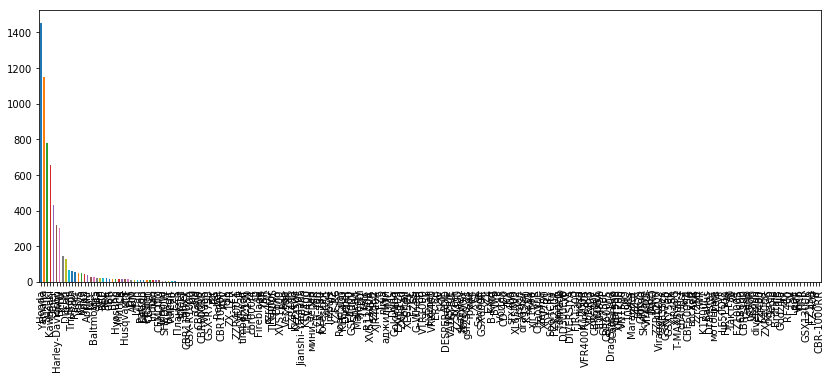

In [226]:
fig = plt.figure(figsize= (14,5))
motorcycles['manufacturer'].value_counts().plot.bar()

2. Вычеслим среднее значение, медиану, дисперсию, стандартное отклонение, наибольшую и наименьшую температуру для каждого месяца

In [167]:
price_model=motorcycles.groupby(by = 'manufacturer')['price'].agg([np.mean, np.median, np.std, np.var, np.min, np.max])
price_model

,mean,median,std,var,amin,amax
manufacturer,,,,,,
000,6.000000e+03,6000.0,NaN,NaN,6000.0,6000.0
1098s,5.600000e+05,560000.0,NaN,NaN,560000.0,560000.0
1300,5.500000e+05,550000.0,NaN,NaN,550000.0,550000.0
3,9.000000e+04,90000.0,NaN,NaN,90000.0,90000.0
35-56,2.300000e+04,23000.0,NaN,NaN,23000.0,23000.0
600rr,2.225000e+05,222500.0,74246.212025,5.512500e+09,170000.0,275000.0
ABM,6.419231e+04,60000.0,26405.127707,6.972308e+08,20000.0,105000.0
AF35zx,1.500000e+04,15000.0,NaN,NaN,15000.0,15000.0
ATV,2.400000e+05,240000.0,14142.135624,2.000000e+08,230000.0,250000.0


<br>

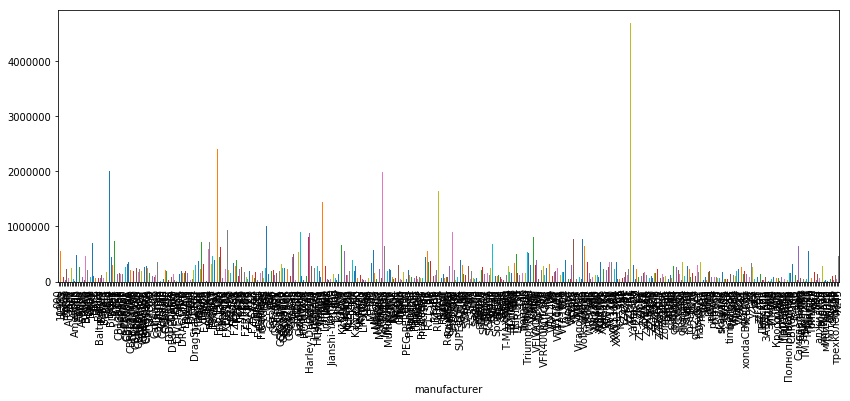

In [168]:
fig = plt.figure(figsize= (14,5))
price_model['mean'].plot.bar()